In [190]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
# from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyemma import msm
%matplotlib inline
import seaborn as sns

In [191]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [192]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB


In [194]:

df = df.dropna()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765819 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 189.9 MB


In [196]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [197]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765819 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 189.9 MB


In [199]:
#converting UNIX epoch time to human readable date-time format

df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765819 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 189.9 MB


In [201]:
df = df.set_index('Timestamp')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2765819 entries, 2011-12-31 07:52:00 to 2019-08-12 00:00:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 168.8 MB


In [203]:
df = df.resample(rule='D').mean()

In [204]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2782 entries, 2011-12-31 to 2019-08-12
Freq: D
Data columns (total 7 columns):
Open                 2779 non-null float64
High                 2779 non-null float64
Low                  2779 non-null float64
Close                2779 non-null float64
Volume_(BTC)         2779 non-null float64
Volume_(Currency)    2779 non-null float64
Weighted_Price       2779 non-null float64
dtypes: float64(7)
memory usage: 173.9 KB


Text(0.5, 1, 'bitstamp.corr()')

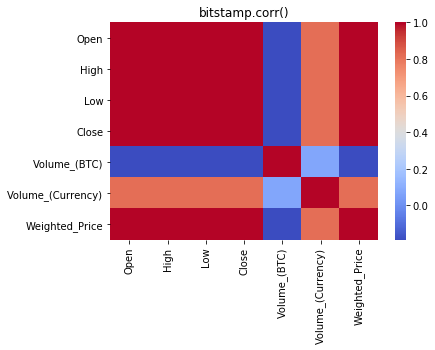

In [206]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('bitstamp.corr()')

In [207]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [208]:
df['Weighted_Price'].describe()

count     2779.000000
mean      2237.664928
std       3393.135987
min          4.331667
25%        221.852596
50%        510.040459
75%       3579.923690
max      19186.169610
Name: Weighted_Price, dtype: float64

In [209]:
df = df.reset_index()

In [210]:
df = df.dropna()

In [211]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


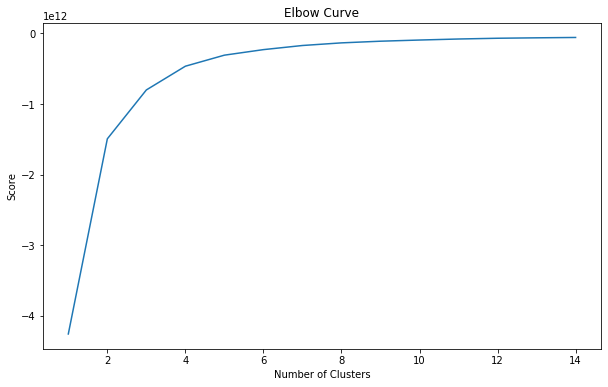

In [212]:
data = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price']]
n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

From the curve we can see that after 5 cluster graph becomes flatter so we will set n_cluster = 5  

In [213]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


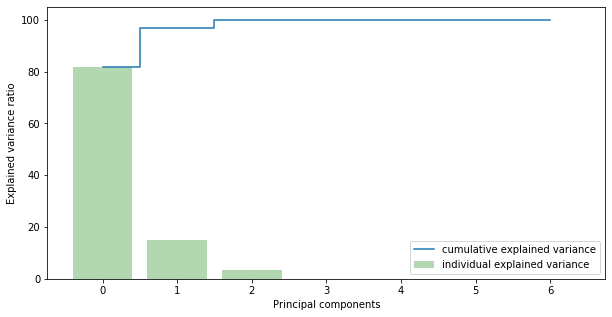

In [215]:
data = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)', 'Weighted_Price']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [216]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [217]:
# Take useful feature and standardize them
data = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)', 'Weighted_Price']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [218]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [219]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[5].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

2    1128
1     666
0     508
5     248
4     204
3      25
Name: cluster, dtype: int64

In [220]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,cluster,principal_feature1,principal_feature2
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,5,-0.690261,1.162149
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,2,-0.632824,-0.517301
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,1,-0.673599,0.679298
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,2,-0.645804,-0.133073
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,1,-0.648949,-0.041143


In [221]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)


D:\Ana3\envs\tf_gpu4\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


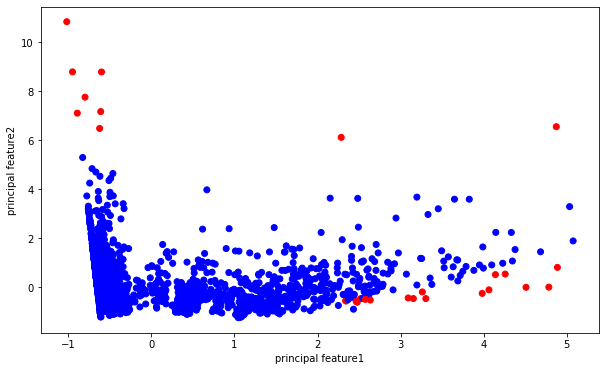

In [222]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();



In [223]:
df.anomaly1.value_counts()

0    2752
1      27
Name: anomaly1, dtype: int64

In [224]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,cluster,principal_feature1,principal_feature2,anomaly1
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,5,-0.690261,1.162149,0
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,2,-0.632824,-0.517301,0
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,1,-0.673599,0.679298,0
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,2,-0.645804,-0.133073,0
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,1,-0.648949,-0.041143,0


In [225]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 12 columns):
Timestamp             2779 non-null datetime64[ns]
Open                  2779 non-null float64
High                  2779 non-null float64
Low                   2779 non-null float64
Close                 2779 non-null float64
Volume_(BTC)          2779 non-null float64
Volume_(Currency)     2779 non-null float64
Weighted_Price        2779 non-null float64
cluster               2779 non-null int32
principal_feature1    2779 non-null float64
principal_feature2    2779 non-null float64
anomaly1              2779 non-null int32
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 238.9 KB


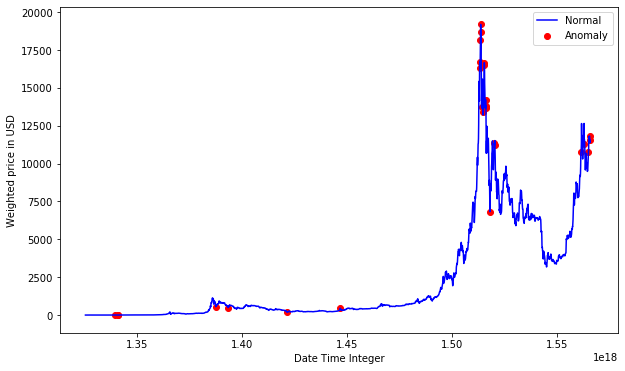

In [227]:
df = df.sort_values('Timestamp')
df['Timestamp_int'] = df.Timestamp.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['Timestamp_int', 'Weighted_Price']] #anomaly

ax.plot(df['Timestamp_int'], df['Weighted_Price'], color='blue', label='Normal')
ax.scatter(a['Timestamp_int'],a['Weighted_Price'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('Weighted price in USD')
plt.legend()
plt.show();

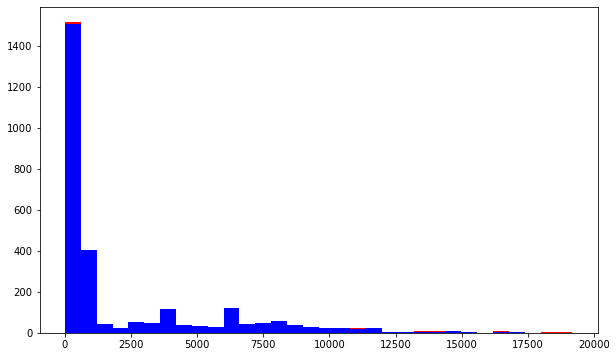

In [229]:
a = df.loc[df['anomaly1'] == 0, 'Weighted_Price']
b = df.loc[df['anomaly1'] == 1, 'Weighted_Price']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

## Isolation Forest for anomaly detection

D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


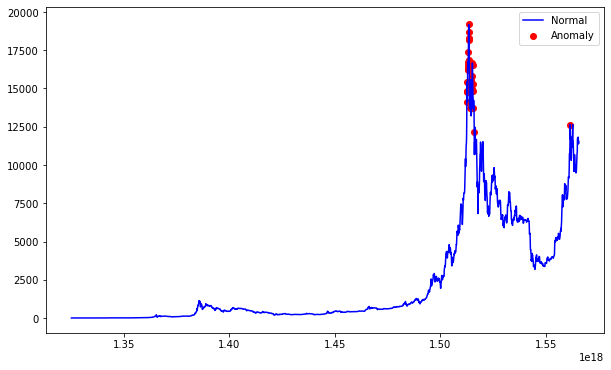

In [231]:
data = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)', 'Weighted_Price']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

df['anomaly2'] = pd.Series(model.predict(data))
# df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )

fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['Timestamp_int', 'Weighted_Price']] #anomaly

ax.plot(df['Timestamp_int'], df['Weighted_Price'], color='blue', label = 'Normal')
ax.scatter(a['Timestamp_int'],a['Weighted_Price'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [232]:
df['anomaly2'].unique()

array([ 1, -1], dtype=int64)

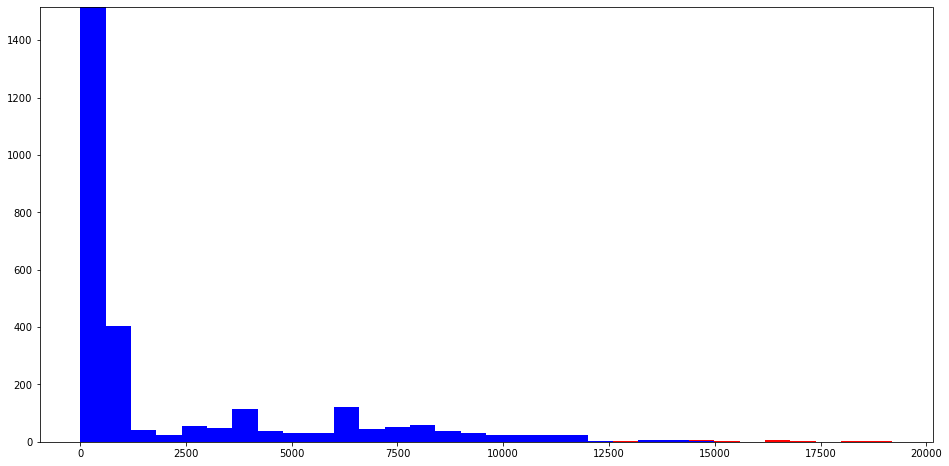

In [234]:
# visualisation of anomaly with avg price repartition
a = df.loc[df['anomaly2'] == 1, 'Weighted_Price']
b = df.loc[df['anomaly2'] == -1, 'Weighted_Price']

fig, axs = plt.subplots(figsize=(16,8))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

## Support Vector Machine-Based Anomaly Detection¶
#### One class SVM

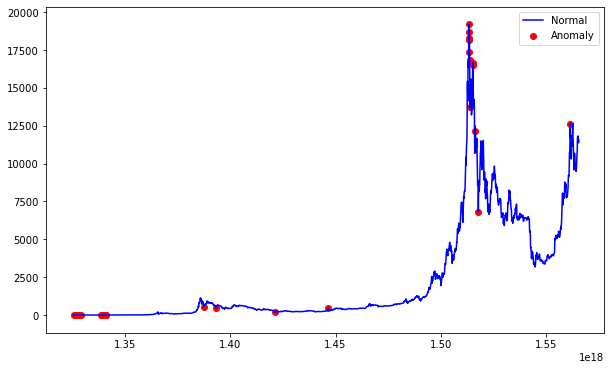

In [237]:
data = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)', 'Weighted_Price']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)
 
df['anomaly3'] = pd.Series(model.predict(data))
# df['anomaly3'] = df['anomaly3'].map( {1: 0, -1: 1} )
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly3'] == -1, ['Timestamp_int', 'Weighted_Price']] #anomaly

ax.plot(df['Timestamp_int'], df['Weighted_Price'], color='blue', label ='Normal')
ax.scatter(a['Timestamp_int'],a['Weighted_Price'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

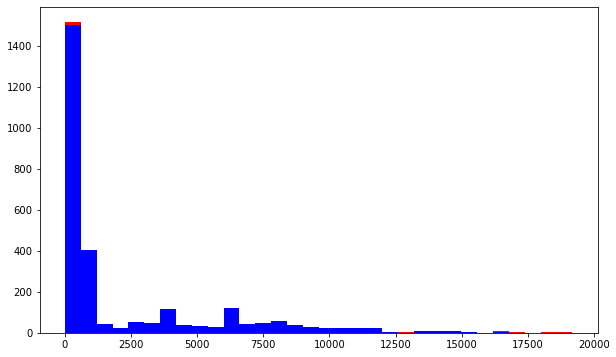

In [238]:
a = df.loc[df['anomaly3'] == 1, 'Weighted_Price']
b = df.loc[df['anomaly3'] == -1, 'Weighted_Price']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();